In [17]:
import numpy as np
import mlrose_hiive as mlrose
import random
import time
import matplotlib.pyplot as plt
from utils import OneMaxEvalCount, FourPeaksEvalCount, KnapsackEvalCount


In [18]:
def fit_iteration_test(problem, iters, algorithm, args, plot=False, alg_name="", prob_name=""):
    args['max_iters'] = iters
    args['max_attempts'] = iters
    args['problem'] = problem
    if iters == np.inf:
        args['max_attempts'] = 100
    return algorithm(**args)

def knapsack_generator(length):
    values = []
    weights = []
    for i in range(length):
        values = random.sample(range(1, length+1), length)
        weights = random.sample(range(1, length+1), length)
    return values, weights



In [19]:
r_hill_args_eval = {
    'problem': None,
    'curve': True,
    'random_state': 13,
    'max_attempts':10,
    'max_iters':100, 
    'restarts':10,
    
}
ga_args_eval = {
    'problem': None,
    'curve': True,
    'random_state': 13,
    'pop_size': 16,
    'mutation_prob': 0.1,
    'max_attempts': 10,
    'max_iters': 100,
    
}
sa_args_eval = {
    'problem': None,
    'curve': True,
    'random_state': 13,
    'schedule': mlrose.GeomDecay(init_temp=10, decay=0.85, min_temp=0.001),
    'max_attempts': 10,
    'max_iters': 100  
}
mimic_args_eval = {
    'problem': None,
    'curve': True,
    'random_state': 13,
    'pop_size': 100,
    'keep_pct': 0.3,
    'max_attempts': 10,
    'max_iters': 100,
    
}

#mimic_args['fast_mimic'] = True



evals = {
    'OneMax':{
        'r_hill': [],
        'SA': [],
        'GA':[],
        'MIMIC':[]
    },
    'FourPeaks':{
        'r_hill': [],
        'SA': [],
        'GA':[],
        'MIMIC':[]
    },
    'Knapsack':{
        'r_hill': [],
        'SA': [],
        'GA':[],
        'MIMIC':[]
    },
}
iters = 100
problem_sizes = [4, 16, 64]
algs = ['r_hill', 'SA', 'GA', 'MIMIC']

for length in problem_sizes:
    print("onemax for length ", length)
    ###OneMax###
    print("r_hill")
    fitness_om = OneMaxEvalCount()
    problem_om = mlrose.DiscreteOpt(length=length, 
                                 fitness_fn=fitness_om
                                )
    state, fitness, curve = fit_iteration_test(problem_om, iters, mlrose.random_hill_climb, r_hill_args_eval, plot=False, alg_name="r_hill", prob_name='OneMax')
    print("# evals: ", fitness_om.num_evals)
    evals['OneMax']['r_hill'].append(fitness_om.num_evals)
    print("sa")
    fitness_om = OneMaxEvalCount()
    problem_om = mlrose.DiscreteOpt(length=length, 
                                 fitness_fn=fitness_om
                                )
    state, fitness, curve = fit_iteration_test(problem_om, iters, mlrose.simulated_annealing, sa_args_eval, plot=False, alg_name="SA", prob_name='OneMax')
    evals['OneMax']['SA'].append(fitness_om.num_evals)
    print("ga")
    fitness_om = OneMaxEvalCount()
    problem_om = mlrose.DiscreteOpt(length=length, 
                                 fitness_fn=fitness_om
                                )
    state, fitness, curve = fit_iteration_test(problem_om, iters, mlrose.genetic_alg, ga_args_eval, plot=False, alg_name="GA", prob_name='OneMax')
    evals['OneMax']['GA'].append(fitness_om.num_evals)
    print("mimic")
    fitness_om = OneMaxEvalCount()
    problem_om = mlrose.DiscreteOpt(length=length, 
                                 fitness_fn=fitness_om
                                )
    state, fitness, curve = fit_iteration_test(problem_om, iters, mlrose.mimic, mimic_args_eval, plot=False, alg_name="MIMIC", prob_name='OneMax')
    evals['OneMax']['MIMIC'].append(fitness_om.num_evals)
    print("fourpeaks for length ", length)
    ###FourPeaks###
    print("r_hill")
    fitness_om = FourPeaksEvalCount()
    problem_om = mlrose.DiscreteOpt(length=length, 
                                 fitness_fn=fitness_om
                                )
    state, fitness, curve = fit_iteration_test(problem_om, iters, mlrose.random_hill_climb, r_hill_args_eval, plot=False, alg_name="r_hill", prob_name='FourPeaks')
    evals['FourPeaks']['r_hill'].append(fitness_om.num_evals)
    print("sa")
    fitness_om = FourPeaksEvalCount()
    problem_om = mlrose.DiscreteOpt(length=length, 
                                 fitness_fn=fitness_om
                                )
    state, fitness, curve = fit_iteration_test(problem_om, iters, mlrose.simulated_annealing, sa_args_eval, plot=False, alg_name="SA", prob_name='FourPeaks')
    evals['FourPeaks']['SA'].append(fitness_om.num_evals)
    print("ga")
    fitness_om = FourPeaksEvalCount()
    problem_om = mlrose.DiscreteOpt(length=length, 
                                 fitness_fn=fitness_om
                                )
    state, fitness, curve = fit_iteration_test(problem_om, iters, mlrose.genetic_alg, ga_args_eval, plot=False, alg_name="GA", prob_name='FourPeaks')
    evals['FourPeaks']['GA'].append(fitness_om.num_evals)
    print("mimic")
    fitness_om = FourPeaksEvalCount()
    problem_om = mlrose.DiscreteOpt(length=length, 
                                 fitness_fn=fitness_om
                                )
    state, fitness, curve = fit_iteration_test(problem_om, iters, mlrose.mimic, mimic_args_eval, plot=False, alg_name="MIMIC", prob_name='FourPeaks')
    evals['FourPeaks']['MIMIC'].append(fitness_om.num_evals)
    
    print("knapsack for length ", length)
    ###Knapsack###
    print("r_hill")
    values, weights = knapsack_generator(length)
    print("val len: ", len(values))
    max_weight_pct = 0.6
    fitness_om = KnapsackEvalCount(weights, values, max_weight_pct)
    problem_om = mlrose.DiscreteOpt(length=length, 
                                 fitness_fn=fitness_om
                                )
    state, fitness, curve = fit_iteration_test(problem_om, iters, mlrose.random_hill_climb, r_hill_args_eval, plot=False, alg_name="r_hill", prob_name='FourPeaks')
    evals['Knapsack']['r_hill'].append(fitness_om.num_evals)
    print("sa")
    fitness_om = KnapsackEvalCount(weights, values, max_weight_pct)
    problem_om = mlrose.DiscreteOpt(length=length, 
                                 fitness_fn=fitness_om
                                )
    state, fitness, curve = fit_iteration_test(problem_om, iters, mlrose.simulated_annealing, sa_args_eval, plot=False, alg_name="SA", prob_name='FourPeaks')
    evals['Knapsack']['SA'].append(fitness_om.num_evals)
    print("ga")
    fitness_om = KnapsackEvalCount(weights, values, max_weight_pct)
    problem_om = mlrose.DiscreteOpt(length=length, 
                                 fitness_fn=fitness_om
                                )
    state, fitness, curve = fit_iteration_test(problem_om, iters, mlrose.genetic_alg, ga_args_eval, plot=False, alg_name="GA", prob_name='FourPeaks')
    evals['Knapsack']['GA'].append(fitness_om.num_evals)
    print("mimic")
    fitness_om = KnapsackEvalCount(weights, values, max_weight_pct)
    problem_om = mlrose.DiscreteOpt(length=length, 
                                 fitness_fn=fitness_om
                                )
    state, fitness, curve = fit_iteration_test(problem_om, iters, mlrose.mimic, mimic_args_eval, plot=False, alg_name="MIMIC", prob_name='FourPeaks')
    evals['Knapsack']['MIMIC'].append(fitness_om.num_evals)

onemax for length  4
r_hill
# evals:  1133
sa
ga
mimic
fourpeaks for length  4
r_hill
sa
ga
mimic
knapsack for length  4
r_hill
val len:  4
sa
ga
mimic
onemax for length  16
r_hill
# evals:  1216
sa
ga
mimic
fourpeaks for length  16
r_hill
sa
ga
mimic
knapsack for length  16
r_hill
val len:  16
sa
ga
mimic
onemax for length  64
r_hill
# evals:  1398
sa
ga
mimic
fourpeaks for length  64
r_hill
sa
ga
mimic
knapsack for length  64
r_hill
val len:  64
sa
ga
mimic


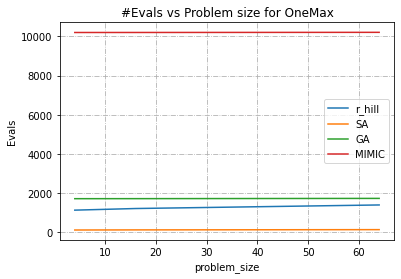

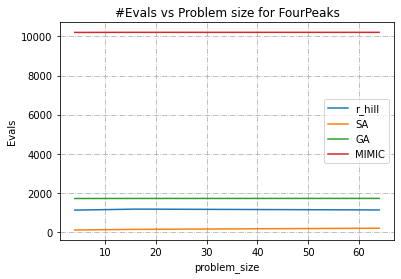

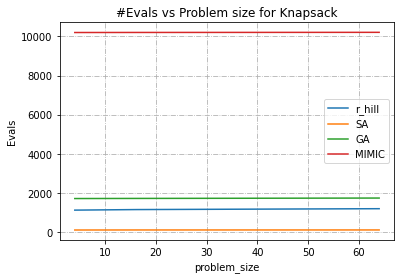

In [22]:

plt.plot(problem_sizes, evals['OneMax']['r_hill'], label='r_hill')
plt.plot(problem_sizes, evals['OneMax']['SA'], label='SA')
plt.plot(problem_sizes, evals['OneMax']['GA'], label='GA')
plt.plot(problem_sizes, evals['OneMax']['MIMIC'], label='MIMIC')
plt.xlabel ("problem_size")
plt.ylabel ("Evals")
plt.legend()
plt.title ("#Evals vs Problem size for OneMax")
plt.grid(True, linestyle='-.')
plt.show()

plt.plot(problem_sizes, evals['FourPeaks']['r_hill'], label='r_hill')
plt.plot(problem_sizes, evals['FourPeaks']['SA'], label='SA')
plt.plot(problem_sizes, evals['FourPeaks']['GA'], label='GA')
plt.plot(problem_sizes, evals['FourPeaks']['MIMIC'], label='MIMIC')
plt.xlabel ("problem_size")
plt.ylabel ("Evals")
plt.legend()
plt.title ("#Evals vs Problem size for FourPeaks")
plt.grid(True, linestyle='-.')
plt.show()

plt.plot(problem_sizes, evals['Knapsack']['r_hill'], label='r_hill')
plt.plot(problem_sizes, evals['Knapsack']['SA'], label='SA')
plt.plot(problem_sizes, evals['Knapsack']['GA'], label='GA')
plt.plot(problem_sizes, evals['Knapsack']['MIMIC'], label='MIMIC')
plt.xlabel ("problem_size")
plt.ylabel ("Evals")
plt.legend()
plt.title ("#Evals vs Problem size for Knapsack")
plt.grid(True, linestyle='-.')
plt.show()

In [25]:
normed_evals = {
    'OneMax':{
        'r_hill': [],
        'SA': [],
        'GA':[],
        'MIMIC':[]
    },
    'FourPeaks':{
        'r_hill': [],
        'SA': [],
        'GA':[],
        'MIMIC':[]
    },
    'Knapsack':{
        'r_hill': [],
        'SA': [],
        'GA':[],
        'MIMIC':[]
    },
}
problems = ['OneMax', 'FourPeaks', 'Knapsack']
algs = ['r_hill', 'SA', 'GA', 'MIMIC']
for prob in problems:
    for alg in algs:
        normed_evals[prob][alg] = [float(i)/sum(evals[prob][alg]) for i in evals[prob][alg]]
        



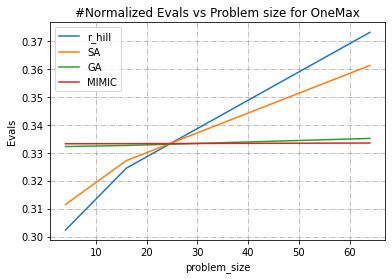

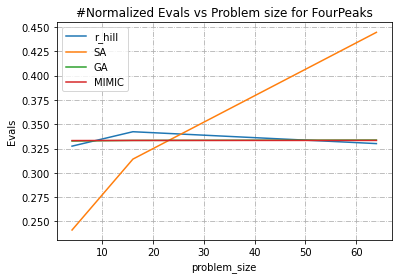

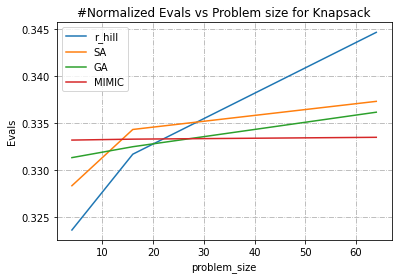

In [26]:
plt.plot(problem_sizes, normed_evals['OneMax']['r_hill'], label='r_hill')
plt.plot(problem_sizes, normed_evals['OneMax']['SA'], label='SA')
plt.plot(problem_sizes, normed_evals['OneMax']['GA'], label='GA')
plt.plot(problem_sizes, normed_evals['OneMax']['MIMIC'], label='MIMIC')
plt.xlabel ("problem_size")
plt.ylabel ("Evals")
plt.legend()
plt.title ("#Normalized Evals vs Problem size for OneMax")
plt.grid(True, linestyle='-.')
plt.show()

plt.plot(problem_sizes, normed_evals['FourPeaks']['r_hill'], label='r_hill')
plt.plot(problem_sizes, normed_evals['FourPeaks']['SA'], label='SA')
plt.plot(problem_sizes, normed_evals['FourPeaks']['GA'], label='GA')
plt.plot(problem_sizes, normed_evals['FourPeaks']['MIMIC'], label='MIMIC')
plt.xlabel ("problem_size")
plt.ylabel ("Evals")
plt.legend()
plt.title ("#Normalized Evals vs Problem size for FourPeaks")
plt.grid(True, linestyle='-.')
plt.show()

plt.plot(problem_sizes, normed_evals['Knapsack']['r_hill'], label='r_hill')
plt.plot(problem_sizes, normed_evals['Knapsack']['SA'], label='SA')
plt.plot(problem_sizes, normed_evals['Knapsack']['GA'], label='GA')
plt.plot(problem_sizes, normed_evals['Knapsack']['MIMIC'], label='MIMIC')
plt.xlabel ("problem_size")
plt.ylabel ("Evals")
plt.legend()
plt.title ("#Normalized Evals vs Problem size for Knapsack")
plt.grid(True, linestyle='-.')
plt.show()